# Task 5: Exploratory Data Analysis (EDA)
## Titanic Dataset (Kaggle Version)

### Objective
To perform exploratory data analysis and extract meaningful insights using statistical and visual techniques.

### Folder Structure Used
- dataset/ → Contains train.csv
- notebook/ → Contains this Jupyter Notebook
- PDF report/ → Final exported report
- screenshots/ → Important visualization images


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")


## Step 1: Load Dataset


In [5]:
df = pd.read_csv("../dataset/titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Dataset Overview


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df['Sex'].value_counts()
df['Pclass'].value_counts()
df['Embarked'].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

### Observations
- Missing values found in Age, Cabin, and Embarked.
- Majority passengers belong to 3rd class.
- More male passengers than female.


## Step 3: Univariate Analysis


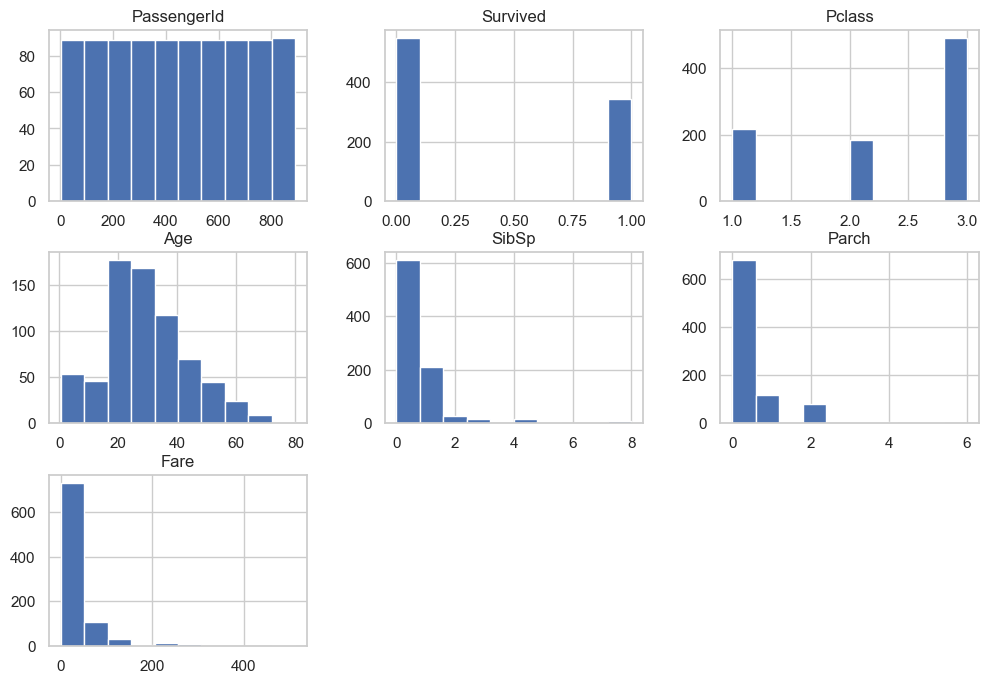

In [9]:
df.hist(figsize=(12,8))
plt.show()


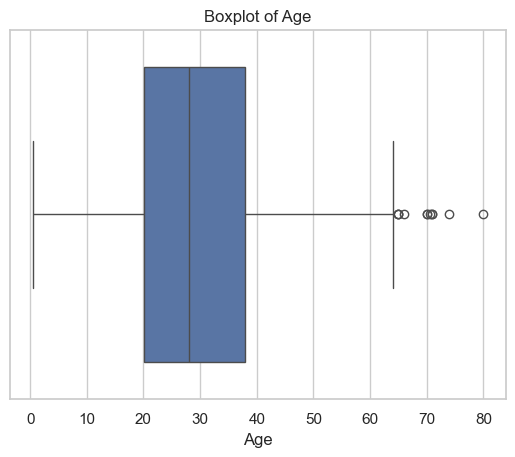

In [10]:
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()


### Observations
- Most passengers are between 20–40 years.
- Fare distribution is highly skewed.
- Outliers present in Age and Fare.


## Step 4: Relationship Analysis


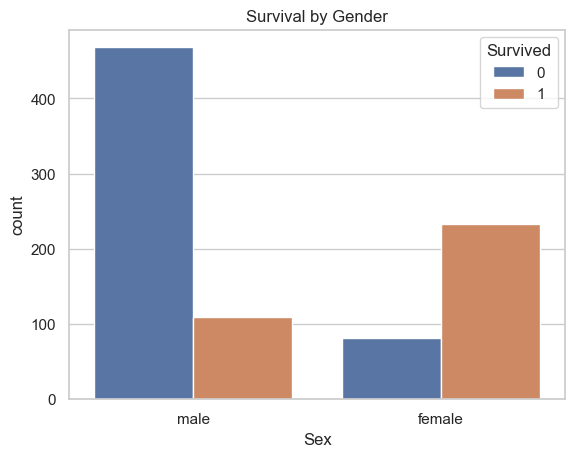

In [11]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()


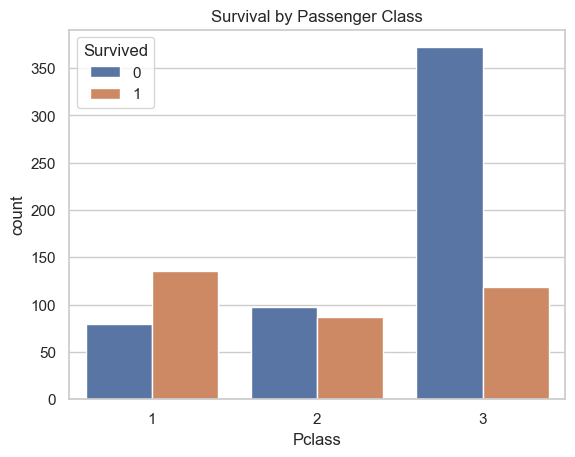

In [12]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()


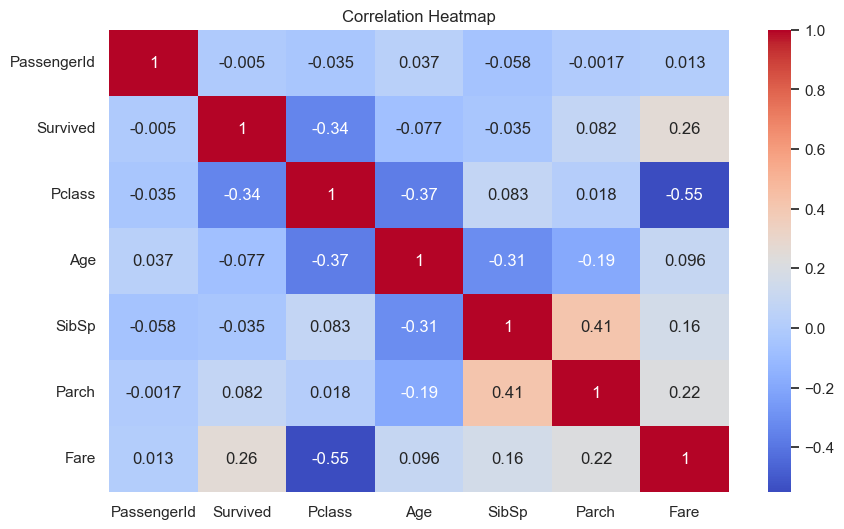

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


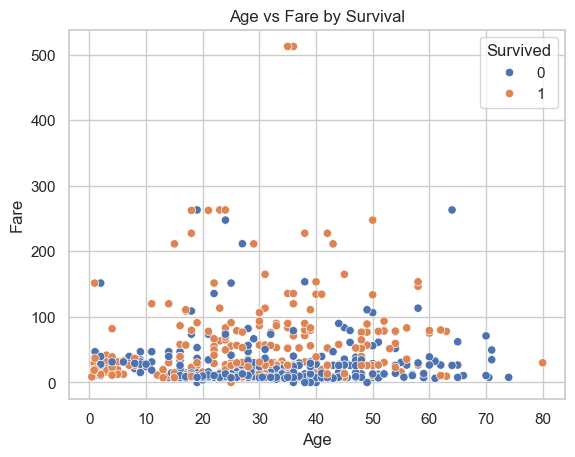

In [14]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Age vs Fare by Survival")
plt.show()


### Observations
- Females have higher survival probability.
- First-class passengers show better survival rates.
- Higher fare passengers were more likely to survive.


## Step 5: Grouped Analysis


In [15]:
df.groupby('Sex')['Survived'].mean()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [16]:
df.groupby('Pclass')['Survived'].mean()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [19]:
df['Age_Group'] = pd.cut(df['Age'],
                         bins=[0,12,18,35,60,80],
                         labels=['Child','Teen','Young Adult','Adult','Senior'])

df.groupby('Age_Group', observed=True)['Survived'].mean()


Age_Group
Child          0.579710
Teen           0.428571
Young Adult    0.382682
Adult          0.400000
Senior         0.227273
Name: Survived, dtype: float64

# Final Summary of Findings

1. Gender significantly influenced survival.
2. Passenger class strongly impacted survival probability.
3. Higher fare increased survival likelihood.
4. Younger passengers had better survival chances.
5. Missing values may affect deeper modeling analysis.
